# Statistical and Machine Learning (01.113) - HW3 Question 4
By: Adam Ilyas 1002010

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats 
from sklearn.svm import SVC 
from sklearn.datasets.samples_generator import make_blobs,make_circles

The `make blobs` and `make circles` functions from `sklearn.datasets` can be invoked to generate
data for the first and second example, respectively.
The following function will be used later to plot the decision boundary, margins and the support
vectors.

In [2]:
def plot_svc_decision(model , ax=None): 
    if ax is None: 
        ax = plt.gca() 
    xlim = ax.get_xlim() 
    ylim = ax.get_ylim()
    # create grid to evaluate model
    x = np.linspace(xlim[0] , xlim[1] , 30) 
    y = np.linspace (ylim[0] , ylim[1] , 30) 
    Y, X = np.meshgrid(y,x) 
    xy = np.vstack([X.ravel() , Y.ravel()]).T 
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins 
    ax.contour(X, Y, P, colors='k' , 
               levels =[-1, 0 , 1], alpha = 0.5, 
               linestyles = ['--' , '-' , '--'] )
    
    # plot support vectors 
    ax.scatter(model.support_vectors_[: , 0],
               model.support_vectors_[: , 1],
               s=300, linewidth=1, edgecolors='black', facecolors='none')
    ax.set_xlim(xlim) 
    ax.set_ylim(ylim)

## Plot first dataset
Use SVC to construct a support vector machine  (you will have to specify a kernel and the
regularization parameter C) to classify this dataset, then use $fit(X, y)$ to feed in the data and
labels. Show your results using the plot svc decision function.

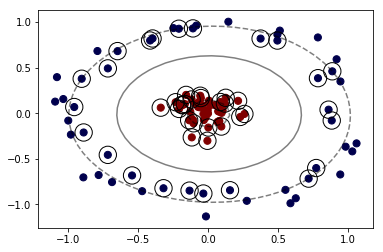

In [9]:
X, y = make_circles(100 , factor =.1, noise =.1) 
fig1 = plt.figure() 
ax1 = fig1.add_subplot(111) 
ax1.scatter(X[: , 0] , X[: , 1] , c=y , s=50, cmap='seismic')
model= SVC(C=0.5, kernel='rbf')
model=model.fit(X,y)
plot_svc_decision(model,ax=ax1)

## Now generate and plot the second dataset.
Your task here is to classify the dataset using different values of the regularization parameter
$C$ to understand soft margins in SVM. Indicate clearly what values of $C$ you are using, and
plot your results with `plot_svc_decision` using $ax2$ for one model and $ax3$ for the other.

Text(0.5, 1.0, 'C = 10')

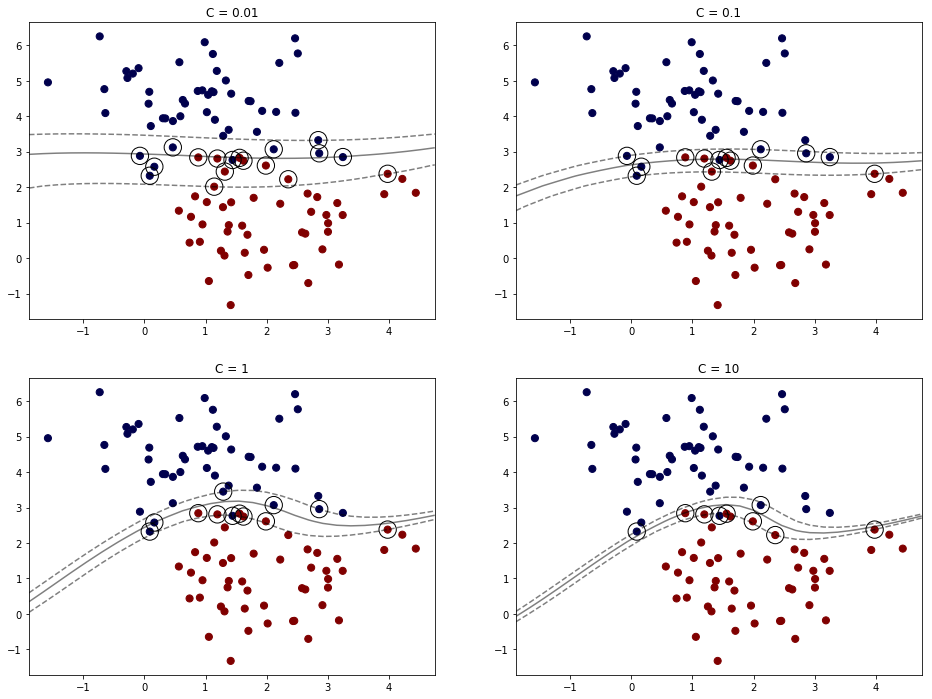

In [16]:
X, y = make_blobs(n_samples=100, centers=2, 
                  random_state=0, cluster_std =1.0) 

fig, axes = plt.subplots(figsize =(16, 12), nrows=2, ncols=2)
axes[0,0].scatter(X[: , 0] , X[: , 1] , c=y , s=50, cmap='seismic')
axes[0,1].scatter(X[: , 0] , X[: , 1] , c=y , s=50, cmap='seismic' )
axes[1,0].scatter(X[: , 0] , X[: , 1] , c=y , s=50, cmap='seismic' )
axes[1,1].scatter(X[: , 0] , X[: , 1] , c=y , s=50, cmap='seismic' )


kernel = 'poly'
# classify and plot
C = 0.01
ax = axes[0,0]
ax.set_title(f"C = {C}")
model = SVC(C=C, kernel=kernel)
model = model.fit(X,y)
plot_svc_decision(model, ax=axes[0,0])


C = 0.1
ax = axes[0,1]
ax.set_title(f"C = {C}")
model = SVC(C=C, kernel=kernel)
model = model.fit(X,y)
plot_svc_decision(model, ax=ax)

C = 1
ax = axes[1,0]
ax.set_title(f"C = {C}")
model = SVC(C=C, kernel=kernel)
model = model.fit(X,y)
plot_svc_decision(model, ax=ax)


C = 10
ax = axes[1,1]
ax.set_title(f"C = {C}")
model = SVC(C=C, kernel=kernel)
model = model.fit(X,y)
plot_svc_decision(model, ax=ax)
axes[1,1].set_title(f"C = {C}")

Given training vectors $x_{i} \in \mathbb{R}^{p},$ is $,$ in two classes, and a vector $y \in\{1,-1\}^{n},$ SVC solves the following primal

$$\min _{w, b, \zeta} \frac{1}{2} w^{T} w+C \sum_{i=1}^{n} \zeta_{i}$$
subject to $$y_{i}\left(w^{T} \phi\left(x_{i}\right)+b\right) \geq 1-\zeta_{i}$$
For all $\zeta_{i} \geq 0, i=1, \ldots, n$

Here, we see that $C$ is the penalty parameter of the error term, where the error term allows constraint to be violated for a cost. As such, a higher penalty (e.g $C = 10$) means that the model will violate the constraints lesser and thus, the margin will be closely determined by the support vectors

A lower penalty ($C = 0.01$) will allow the model to violate more constraints, allowing the margin to be larger, as it allows some vectors to overlap with the margin.